In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import keras

import os

In [11]:
data = []

for label in os.listdir('../data/seg_train/seg_train'):
    for img in os.listdir('../data/seg_train/seg_train' + '/' + label):
        data.append([img, label])
        
        
train = pd.DataFrame(data).rename(columns={0:'img', 1:'label'})

In [12]:
train.head()

,img,label
0,0.jpg,buildings
1,10006.jpg,buildings
2,1001.jpg,buildings
3,10014.jpg,buildings
4,10018.jpg,buildings


In [13]:
# count total size of training set
train.value_counts(subset='label').sum()

14034

- So we have 14,000 images to train on.

<br>

In [14]:
train.value_counts(subset='label', normalize=True)

label
mountain     0.178994
glacier      0.171298
street       0.169731
sea          0.162035
forest       0.161821
buildings    0.156121
dtype: float64

- The classes are also uniformly distributed. This gives us a baseline accuracy of 17.9% (which is acheived by just guessing "mountain" for every image).

<br>

---

<br>

Let's take a look at some of the images. We will keep them in their native $ 150 \times 150 $ size to "see what the machine sees".

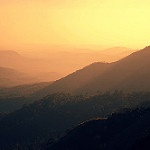

In [22]:
# an img in the 'mountain' class
Image(filename='../data/seg_train/seg_train/mountain/10000.jpg')

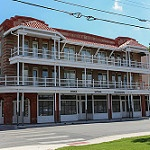

In [35]:
# an img in the 'building' class
Image(filename='../data/seg_train/seg_train/buildings/1001.jpg')

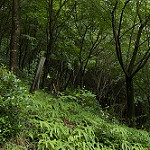

In [26]:
# an img in the 'forest' class
Image(filename='../data/seg_train/seg_train/forest/10007.jpg')

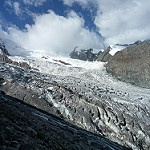

In [27]:
# an image in the 'glacier' class
Image(filename='../data/seg_train/seg_train/glacier/10003.jpg')

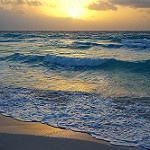

In [29]:
# an image in the 'sea' class
Image(filename='../data/seg_train/seg_train/sea/10041.jpg')

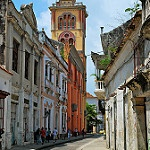

In [34]:
# an image in the 'street' class
Image(filename='../data/seg_train/seg_train/street/10019.jpg')

<br>

By comparing the "street" image to the "building" image, we can already foresee a potential issue: The pictures of buildings contain streets and the pictures of streets contain buildings!

Comparing image ```10019.jpg``` vs image ```1006.jpg```: can we reasonably expect even a human to properly label street versus building?

<br>

<center>
    <img src='../data/seg_train/seg_train/street/10019.jpg' width=200> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <img src='../data/seg_train/seg_train/buildings/1001.jpg' width=200>
    </center>
    
<br>

It is unfair to expect a machine learning model to be able to correctly decide which of these two images is a "building" and which is a "street" since both are equally valid. For this reason, we suspect that there is a theoretical limit to accuracy level any model can achieve. Let us consider what is a reasonable estimate for this theoretical limit.


### Estimate of Maximum Accuracy

The images of streets and buildings account for approximately 32.5% of the training set. If we assume that no human can consistently decide between these two classes, then we expect approximately 50% of the street and building images to be classified correctly. Assuming further that a human can correctly classify the remaining 4 classes with 100% accuracy, there is a theoretical limit of:
$$(1-0.325) + (0.325)*(0.5) = 0.8375$$
or approximately 84% accuracy.

Of course this assumes all images labelled streets and buildings are equally indistinguishable. Without a visual inspection through both data sets, it is rather hard to say if this is indeed the case. We thus give a table of theoretical maximum accuracy, parameterized by the constant $\lambda$ representing "the percentage of images in the streets and buildings class which are indistinguinshable to a human". The formula is given by:

$$ \text{max acc.} = \text{ (# of non-street and non-building images) } + \text{ (# of distinguishable street and building images) } + \text{ (# of correct answers from random guessing) } $$
$$ \text{ max acc.} = (1-0.325) + (0.325)(1-\lambda)+(0.325)\frac{\lambda}{2}$$

|$\lambda$|Maximum Accuracy|
|---|---|
|1 | 83.75\%|
|0.75 | 87.8 \% |
|0.5 | 91.2\% |
|0.25 | 95.9 \% |
|0 | 100 \% |

In [47]:
def acc(r):
    return (1-0.325)+(0.325)*(1-r)+(0.325)*r/2

In [50]:
for r in [1, 0.75, 0.5, 0.25, 0]:
    print( acc(r) )

0.8375
0.878125
0.9187500000000001
0.9593750000000001
1.0
